In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10

In [4]:
red = pd.read_csv('winequality-red.csv',sep=";")
red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
white = pd.read_csv('winequality-white.csv',sep=";")
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


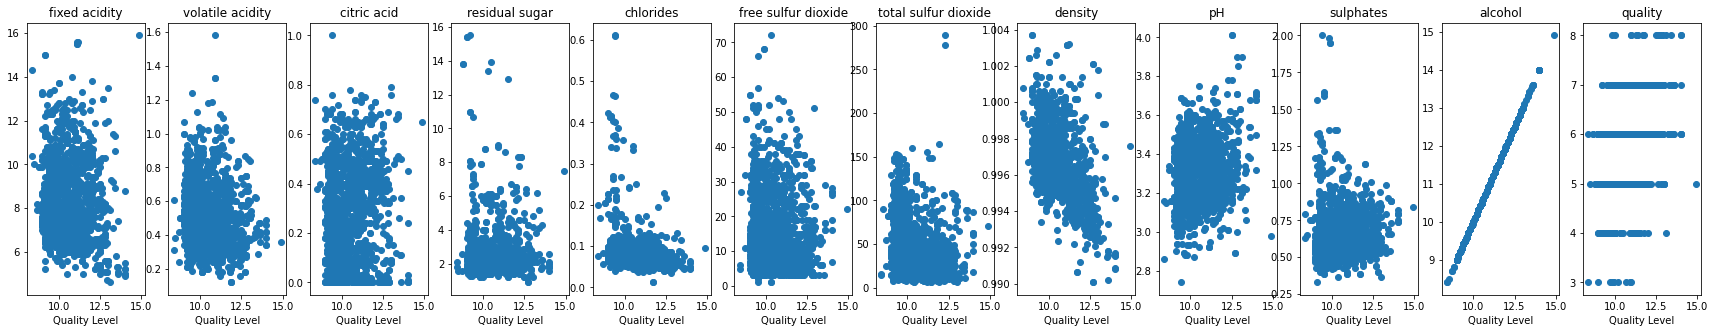

In [6]:
fig, axes = plt.subplots(1,12,figsize=(30,5))
for i,ax in enumerate (axes.ravel()):
    ax.scatter (x=red["alcohol"],y=red[red.columns[i]])
    ax.set_title(red.columns[i])
    ax.set_xlabel('Quality Level')

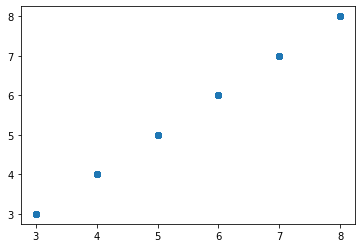

In [5]:
plt.scatter (x=red[red.columns[i]],y=red["quality"])

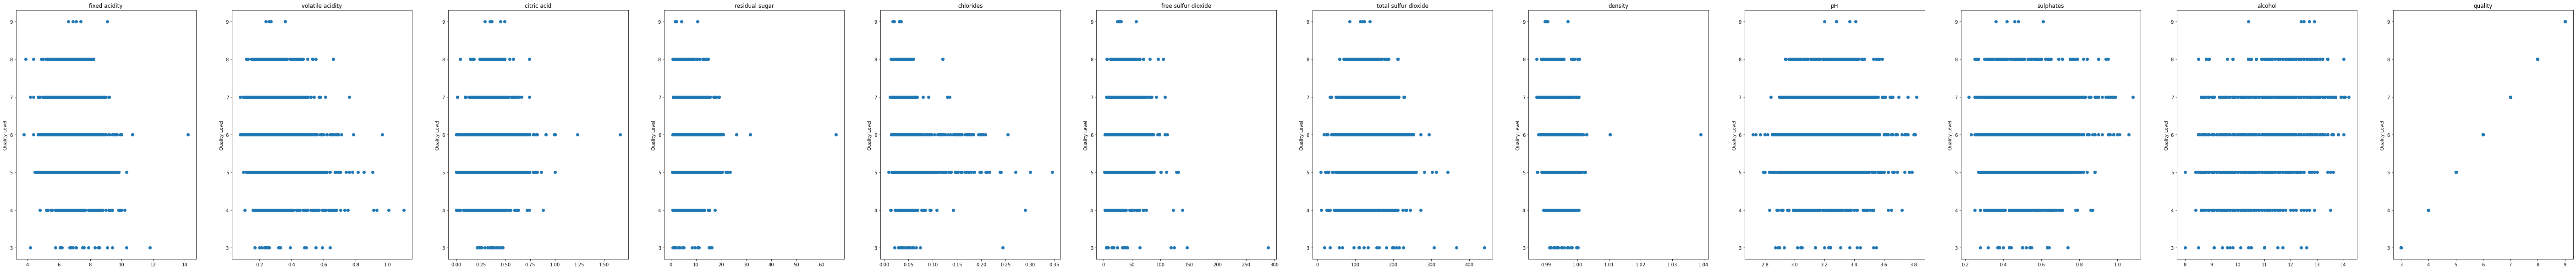

In [7]:
fig, axes = plt.subplots(1,12,figsize=(100,10))
for i,ax in enumerate (axes.ravel()):
    ax.scatter (x=white[white.columns[i]],y=white["quality"])
    ax.set_title(white.columns[i])
    ax.set_ylabel('Quality Level')

(4898, 12)

(1599, 11)

(1599, 1)

In [16]:
from sklearn.model_selection import train_test_split
y= white.quality 
X =white.drop('quality',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [17]:
from sklearn.linear_model import LinearRegression
reg_fixed = LinearRegression()
reg_fixed.fit(X_fixed_train, y_train)
reg_fixed.score(X_fixed_test,y_test)

0.25006487392797405

In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
param_grid = {'alpha': np.logspace(-3,1,20)}
print(param_grid)

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)

grid_ridge.fit(X_train, y_train)

{'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])}


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.62377674e-03, 2.63665090e-03, 4.28133240e-03,
       6.95192796e-03, 1.12883789e-02, 1.83298071e-02, 2.97635144e-02,
       4.83293024e-02, 7.84759970e-02, 1.27427499e-01, 2.06913808e-01,
       3.35981829e-01, 5.45559478e-01, 8.85866790e-01, 1.43844989e+00,
       2.33572147e+00, 3.79269019e+00, 6.15848211e+00, 1.00000000e+01])},
             return_train_score=True)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
best_param_ridge = grid_ridge.best_params_
best_param_ridge

{'alpha': 0.001}

In [23]:
ridge = Ridge( alpha = best_param_ridge['alpha'])
ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [32]:
ridge_score = ridge.score(X_test,y_test)
ridge_score

0.9493108457607432

In [44]:
prediction_x = np.linspace(0,15).reshape(-1,1)

prediction_y = grid_ridge.predict(prediction_x)
prediction_y

plt.scatter(X,y,color = 'blue')
plt.plot(prediction_x, prediction_y,color = 'red')
ax.set_xlabel = ('fixed acidity')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 1)

In [45]:
from sklearn.metrics import r2_score


ValueError: y_true and y_pred have different number of output (11!=1)

In [81]:
y = red['quality'].values.reshape(-1,1)
y.shape

(1599, 1)

In [82]:
x = red['pH'].values.reshape(-1,1)
x.shape

(1599, 1)

In [88]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression
reg_fixed = LinearRegression()
reg_fixed.fit(X_train, y_train)
reg_fixed.score(X_test,y_test)

0.003062801329370979

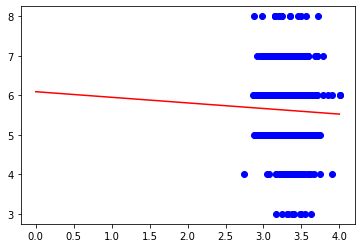

In [93]:
prediction_x = np.linspace(4,0).reshape(-1,1)

prediction_y = reg_fixed.predict(prediction_x)
prediction_y

plt.scatter(x,y,color = 'blue')
plt.plot(prediction_x, prediction_y,color = 'red')
plt.xlabel = ("pH")
plt.show()